In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
quora=pd.read_csv("train.csv")

In [4]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


## EDA

In [5]:
quora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


- There are 2 null entries in the question2 column we have to remove them
- There is 1 null entry in question1 column

There are multiple ways to check for null entries in the dataset
- check the datatype
- use syntax df.isnull.any(axis=1)

In [ ]:
for index,row in quora.iterrows():
    if(type(row["qid1"] or row["qid2"]) is str):
        continue
    else:
        print(index)
        #print(row)

In [6]:
quora[quora.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


So question numbers {174364,493340} are null questions. we can further try to find if these entries are given null by mistake or is there is any question for these id's at all

In [7]:
print(quora[quora["qid2"]==493340])
print(quora[quora["qid1"]==174364])
print(quora[quora["qid1"]==493340])
print(quora[quora["qid2"]==174364])

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []
Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []
            id    qid1    qid2 question1  \
363362  363362  493340  493341       NaN   

                                                question2  is_duplicate  
363362  My Chinese name is Haichao Yu. What English na...             0  
            id    qid1    qid2                         question1 question2  \
105780  105780  174363  174364    How can I develop android app?       NaN   
201841  201841  303951  174364  How can I create an Android app?       NaN   

        is_duplicate  
105780             0  
201841             0  


There are no questions given at all for these id's so it is better to remove them

## Basic Statistics

In [20]:
print("Number of 0's and 1's in the dataset: \n"+ str(quora.groupby("is_duplicate")["id"].count()))

Number of 0's and 1's in the dataset: 
is_duplicate
0    255027
1    149263
Name: id, dtype: int64


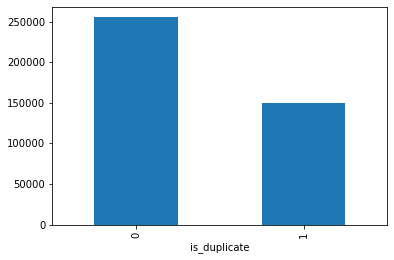

In [23]:
quora.groupby("is_duplicate")["id"].count().plot.bar()

In [25]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(quora['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(quora['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


- mean of "is_duplicate" column will give percentage of 1's in the column

In [27]:
quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### Distribution of questions

In [50]:
total=pd.Series(quora["qid1"].tolist()+quora["qid2"].tolist())
#qtotal=np.array(total)

In [ ]:
total.value_counts().plot.bar()